<a href="https://colab.research.google.com/github/eormeno12/CursoIntroduccionAlML/blob/4.Redes_Neurales_y_reconocimiento_de_im%C3%A1genes/4_Redes_Neurales_y_reconocimiento_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes neuronales

En la vida real la mayoría de problemas que vamos a resolver no serán lineales, afortunadamente tenemos varias herramientas que nos permiten modelarlo. Para esto necesitamos a las redes neuronales artificiales.

Con una capa oculta se agregan nodos y existirá una conexión entre ellos, estas pueden variar siendo de una o múltiples vías. También se pueden moderar de varias formas y cada una de estas capas puede variar dependiendo de la cantidad de capas ocultas que tengamos.

Cada neurona tiene una función de activación y nos va a permitir conectar las múltiples capas para realizar la transformación de lineal a red neuronal.

*   **Perceptrón:** Neurona básica. Tendrá la entrada, salida y una función en medio. Normalmente trabaja con la función escalón de Heaviside. A esto se le puede agregar complejidad y funciones de activación como Sigmoid, Tanh, ReLUs y otras más.

###Funciones de activación de neuronas

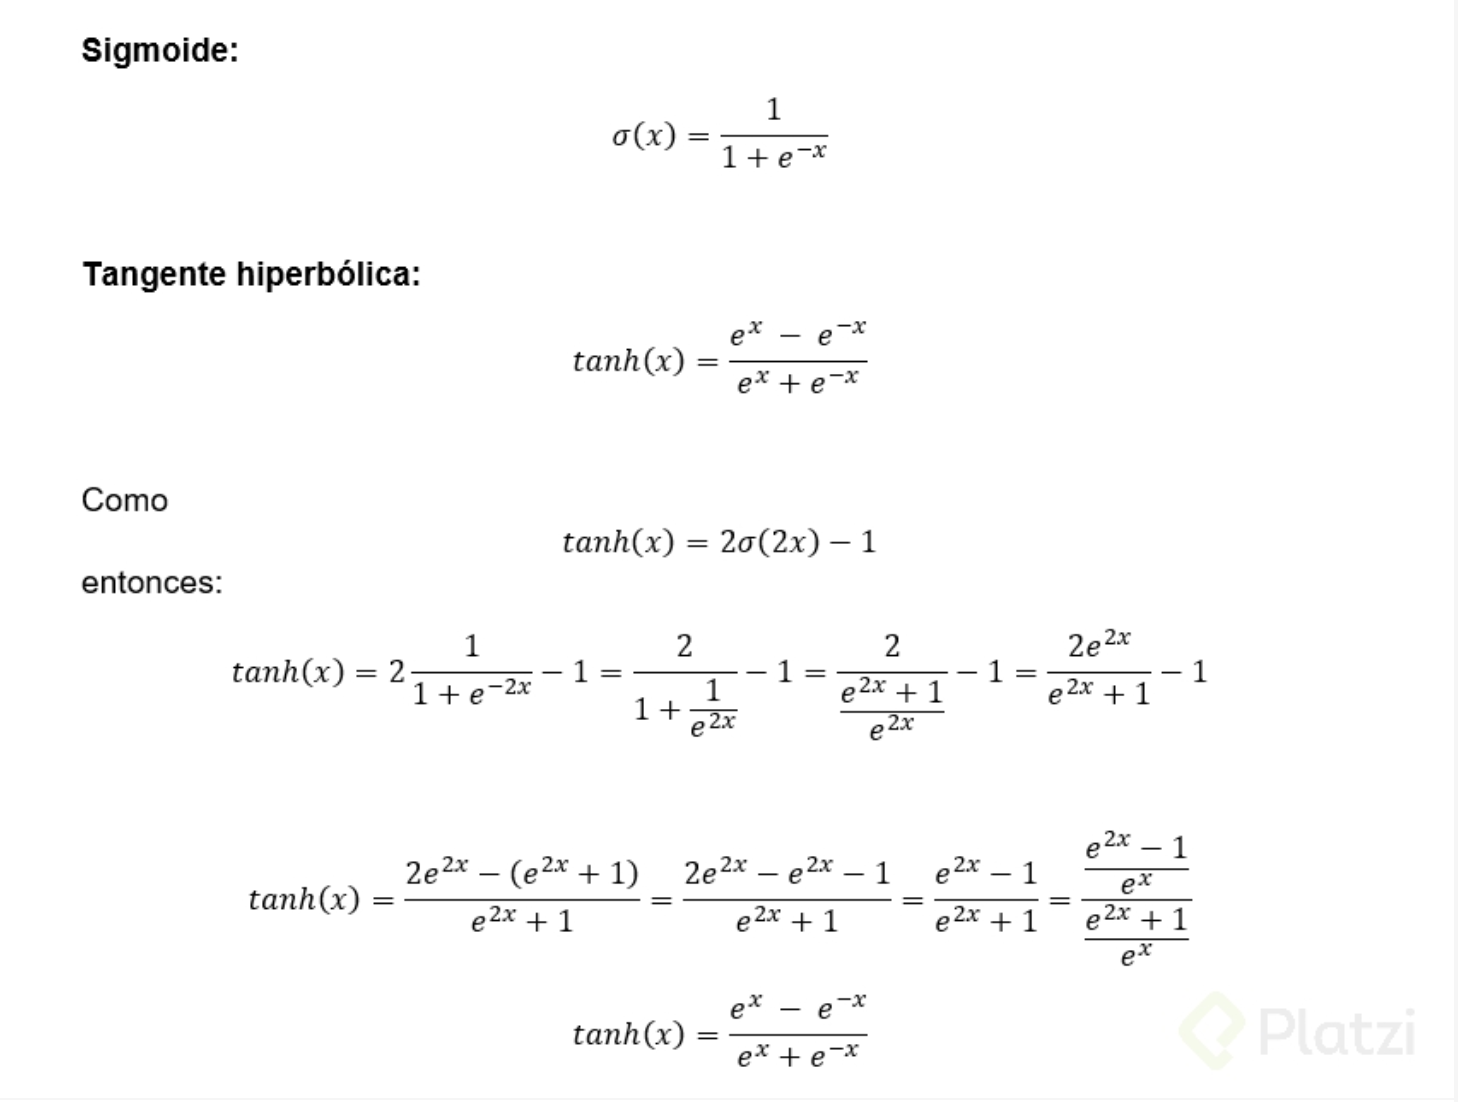

*   **Tanh:** Se puede modelar como un caso específico del Sigmoid, nos ayuda porque esta escalado. La curva es diferente y puede saturarse en algunos casos.
*   **ReLU:** Evita el problema de vanishing gradient pero solo puede utilizarse en las hidden layers de una NN. Existen variantes para evitar algunos de los problemas más comunes como neuronas muertas.

#Modelo pre entrenado para reconocimiento de imágenes

---



In [ ]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request

import matplotlib.pyplot as plt

Traemos el modelo pre entrenado inception 

In [ ]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


Cargamos la imagen mediante el url

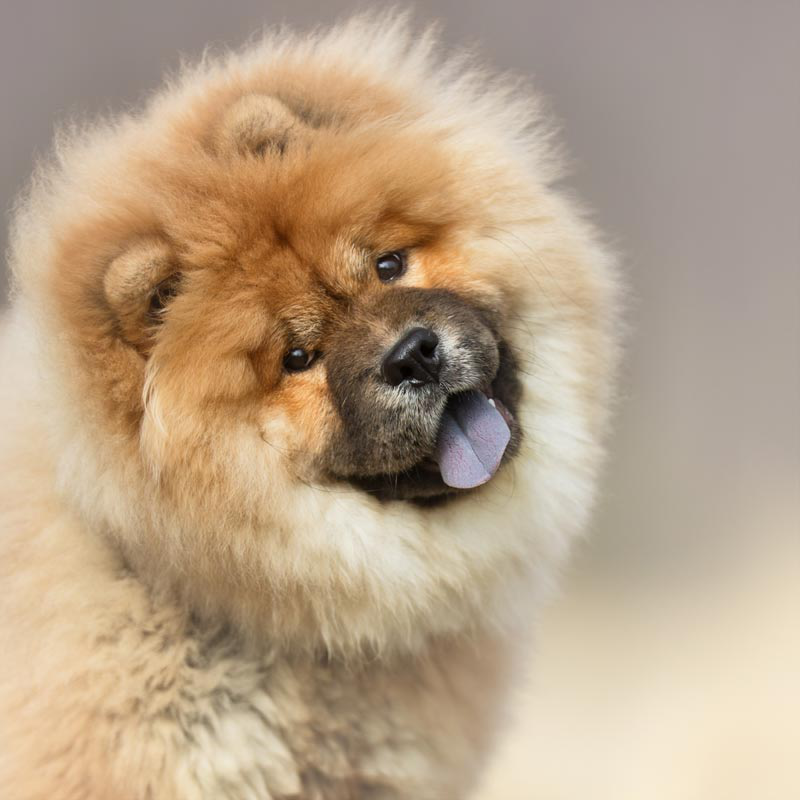

In [ ]:
url = "https://www.hola.com/imagenes/estar-bien/20200630171192/razas-perro-chino-chow-chow/0-842-64/chow-chow-8a-a.jpg"
image = request.urlretrieve(url, "test.jpg")
img = Image.open(image[0])
img

Transformamos la imagen en un tensor y reducimos su tamaño y la centramos.

En ML es mejor reducir la imagen y centrarla para que el modelo pueda reconocer con mayor precisión lo que se muestra. Cuando una imagen es demasiado grande, surgen complicaciones mientras que cuando la imagen es pequeña, el training es mucho más rápido.

In [ ]:
preprocess = transforms.Compose([
  transforms.Resize(128),
  transforms.CenterCrop(128),
  transforms.ToTensor(),
  transforms.Normalize(
  mean=[0.485, 0.456, 0.406],
  std=[0.229, 0.224, 0.225]
  )
])

Utilizamos **unsqueeze** para añadir la dimensión faltante en el tensor de la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


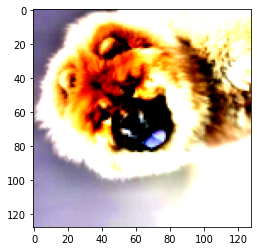

In [ ]:
img_trans = preprocess(img)
batch = torch.unsqueeze(img_trans, 0)
plt.imshow(img_trans.T)

In [ ]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

El **out** retorna un tensor de 1000 elementos que son los pesos de acuerdo a la cantidad de etiquetas que puede reconocer este modelo pre entrenado.

Por ejemplo, 
si nuestra imagen es un chow chow y la etiqueta chow chow se encuentra en la posicion 100, esta tendrá un valor más alto ya que el modelo la identificado como que tiene un **mayor peso**, mientras que la etiqueta que diga gato va a tener un valor mucho menor.

Es por la explicación superior que en las siguientes líneas buscaremos el **max** dentro del tensor.

In [ ]:
out = inception(batch)
out.shape, out

(torch.Size([1, 1000]),
 tensor([[ 1.3259e+00,  3.4905e+00, -7.3281e-02, -2.9063e+00, -5.9340e+00,
          -5.8516e-01, -4.0877e+00, -4.0719e+00,  6.0326e+00, -9.7118e-01,
           2.5794e+00,  3.2901e+00,  7.1776e+00, -4.3512e+00,  1.1783e+00,
          -9.5728e+00, -4.5856e+00, -3.9090e-01, -5.4429e+00,  1.6124e-01,
          -4.9917e+00, -6.7875e+00, -4.1548e+00, -5.1848e+00,  1.6575e+00,
           1.7854e+00,  1.5831e+00,  1.1531e+00,  7.3617e+00,  3.8104e+00,
           4.4149e+00,  4.2999e+00, -1.0815e+00,  3.7284e+00, -3.1740e+00,
          -6.3152e-01, -9.6317e-02, -7.5341e-01, -4.6625e+00, -3.2287e+00,
          -2.0705e+00, -1.7583e+00, -5.5446e+00, -2.1315e+00, -3.9308e+00,
          -5.4121e+00, -5.5341e+00,  8.6223e-01, -4.2429e-01, -3.9356e+00,
          -4.6286e-01,  4.7864e+00, -3.8259e+00,  1.1829e+00, -4.9364e+00,
           6.2201e+00, -6.4837e+00, -5.5041e-01, -5.4954e-01,  1.0092e+00,
          -6.1944e+00, -1.4197e+00, -3.4112e+00,  1.6065e+00,  7.7310e+00,
 


Traemos de **gist** las etiquetas para el ML.

In [ ]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')

with open("labels.txt") as f:
  labels = [line.strip() for line in f.readlines()]

Aquí lo que buscamos es obtener el valor más grande del batch, ya que en teoría este es el que tiene mayor peso/probabilidad de acertar con lo que muestra la imagen.

Relación imagen - etiqueta.

Además, pedimos el index para posteriormente utilizarlo a la hora de mostrar la etiqueta correcta.

In [ ]:
_, index = torch.max(out, 1)

**torch.nn.functional.softmax(out, dim=1)** -> Esta función se encarga de normalizar los valores del **out** entre el numero 1 y 0, siendo los menores más cercanos a 0 y los mayores a 1.

**torch.nn.functional.softmax(out, dim=1)[0]** -> Regresa todos los valores.

**torch.nn.functional.softmax(out, dim=1)[0]*100** -> Multiplica todos los valores para que aparezcan en porcentaje.

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('chow, chow chow', 100.0)

In [ ]:
_, index = torch.sort(out, descending=True)
top_five = index[0, :5]
for i in top_five:
  print(labels[i], percentage[i].item())

chow, chow chow 100.0
Pekinese, Pekingese, Peke 3.2407222079200437e-06
Pomeranian 2.8315588096461397e-08
lion, king of beasts, Panthera leo 3.2579824948975045e-10
Persian cat 6.3665487812225585e-12


#Trabajando con un dataset


---



Cuando se trabaja en Colab el dataset se guarda en una ruta interna en este caso, la especificada por el data_path. 

Cuando se trabaja en un IDE instalado en la computadora, se debe especificar la ruta **en la computadora**.

In [ ]:
data_path = "data/"
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validatation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
len(dataset)

50000

Visualización de una imagen al azar

In [ ]:
img, label = dataset[100]
img, label

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6D95E03400>, 8)

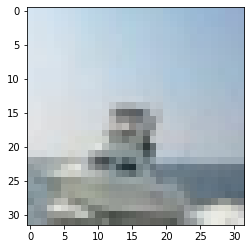

In [ ]:
plt.imshow(img)

Transformando la imagen a tensor.

In [ ]:
tensor_transformer = transforms.ToTensor()
im_tensor = tensor_transformer(img)
im_tensor, im_tensor.shape

(tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
          [0.9373, 0.9294, 0.9294,  ...,

Transformar la imagen a tensor desde la creación del dataset.

In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=tensor_transformer)

Files already downloaded and verified


In [ ]:
img, label = dataset[100]
img, label

(tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
          [0.9373, 0.9294, 0.9294,  ...,

In [ ]:
img.min(), img.max()

(tensor(0.1176), tensor(0.9490))

Para poder visulizar la imagen, ya no se debe de colocar el **img** de forma directa cuando está en forma de tensor, se debe hacer una transposición de este.

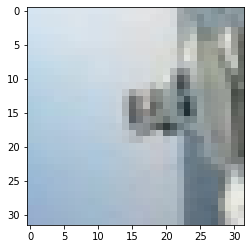

In [ ]:
plt.imshow(img.T)

Creamos un stack para posteriormente aplicar la normalización.

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

Media del stack.



In [ ]:
mean = imgs.view(3, -1).mean(dim=1)
mean

tensor([0.4915, 0.4823, 0.4468])

Desviación estándar del stack.

In [ ]:
std = imgs.view(3, -1).std(dim=1)
std

tensor([0.2470, 0.2435, 0.2616])

Con ayuda de la media y desviación estándar, volvemos a llamar al dataset para que sus datos se encuentren normalizados mediante el uso de la librería pytorch.transforms.

In [ ]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean, std)
])

In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'horse'

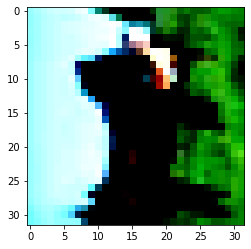

In [ ]:
img_transformed, label = dataset[12]
plt.imshow(img_transformed.T)
classes[label]